# 1. Import Libraries

In [1]:
# !pip install opencv-python

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from glob import glob
from PIL import Image
import cv2
from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    OrdinalEncoder, 
    OneHotEncoder, 
    StandardScaler, 
    MinMaxScaler
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

np.random.seed(12345)

# 2. Read Data

In [3]:
classes = ['angular_leaf_spot', 'bean_rust', 'healthy']

In [4]:
X = np.empty([0, 32*32*3])
y = np.empty([0, 1])

for _class in tqdm(classes):
    img_path = glob('dataset/' + _class + '/*')
    for path in tqdm(img_path):
        img = Image.open(path)
        img = img.resize([32, 32])
        img = np.array(img)
        if img.shape[2] == 4:
            img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)
        img = img.reshape(1, -1)
        X = np.vstack([X, img])
        if _class == 'healthy':
            y = np.vstack([y, 'healthy'])
        else:
            y = np.vstack([y, 'unhealthy'])

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/336 [00:00<?, ?it/s]

  0%|          | 0/337 [00:00<?, ?it/s]

# ### 3. Clean Data

# 4. Split Dataset into Training & Test Sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

# 5. Data Preparation

## ### 5.1. Ordinal Encoding

## ### 5.2. One Hot Encoding

## 5.3. Feature Scaling

### 5.3.1. Training Set

In [6]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

### 5.3.2. Test Set

In [7]:
X_test_scaled = scaler.transform(X_test)

# 6. Model Creation

## 6.1. Setting Parameters

In [8]:
clf = KNeighborsClassifier(n_neighbors=3)

## 6.2. Train Model

In [9]:
clf.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

# 7. Prediction

## 7.1. Training Set

In [10]:
y_pred_train = clf.predict(X_train_scaled)

## 7.2. Test Set

In [11]:
y_pred_test = clf.predict(X_test_scaled)

# 8. Model Evaluation

## 8.1. Training Set

### 8.1.1. Confusion Matrix

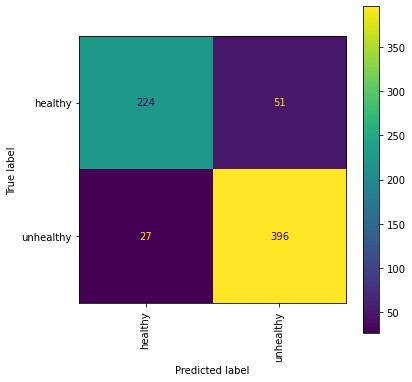

In [12]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_confusion_matrix(clf, X_train_scaled, y_train, ax=ax)
plt.xticks(rotation=90)
plt.show()

### 8.1.2. Scoring

In [13]:
report = classification_report(y_train, y_pred_train, output_dict=True)

In [14]:
print('accuracy =', report['accuracy'])

accuracy = 0.8882521489971347


In [15]:
pd.DataFrame.from_dict(report).T

,precision,recall,f1-score,support
healthy,0.892430,0.814545,0.851711,275.000000
unhealthy,0.885906,0.936170,0.910345,423.000000
accuracy,0.888252,0.888252,0.888252,0.888252
macro avg,0.889168,0.875358,0.881028,698.000000
weighted avg,0.888476,0.888252,0.887244,698.000000


## 8.2. Test Set

### 8.2.1. Confusion Matrix

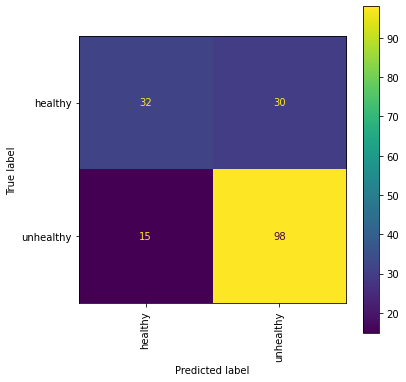

In [16]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_confusion_matrix(clf, X_test_scaled, y_test, ax=ax)
plt.xticks(rotation=90)
plt.show()

### 8.2.2. Scoring

In [17]:
report = classification_report(y_test, y_pred_test, output_dict=True)

In [18]:
print('accuracy =', report['accuracy'])

accuracy = 0.7428571428571429


In [19]:
pd.DataFrame.from_dict(report).T

,precision,recall,f1-score,support
healthy,0.680851,0.516129,0.587156,62.000000
unhealthy,0.765625,0.867257,0.813278,113.000000
accuracy,0.742857,0.742857,0.742857,0.742857
macro avg,0.723238,0.691693,0.700217,175.000000
weighted avg,0.735591,0.742857,0.733166,175.000000


# 9. Save Model

In [20]:
import pickle

In [21]:
pickle.dump((clf, 
             scaler),  open('k_nearest_neighbor_model.pickle', 'wb'))